In [1]:
from zipline.api import order, record, symbol, set_benchmark
import zipline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from collections import OrderedDict
import pytz

In [2]:
full_file_path = "./data/LKTB_DAILY.csv"
data = OrderedDict()
data['LKTB'] = pd.read_csv(full_file_path, index_col=0, parse_dates=['date'])
data['LKTB'] = data['LKTB'][["open","high","low","close","volume"]]
print(data['LKTB'].head())


# data['LKTB'] = pd.read_csv("./data/LKTB_DAILY.csv", index_col=0, parse_dates=True)

              open    high     low   close  volume
date                                              
2012-01-02  102.04  102.04  101.83  101.93   16395
2012-01-03  101.84  101.93  101.68  101.81   21500
2012-01-04  101.76  101.82  101.70  101.74   30370
2012-01-05  101.79  101.93  101.71  101.90   24668
2012-01-06  101.91  102.03  101.72  101.86   26846


In [3]:
panel = pd.Panel(data)
panel.minor_axis = ['open','high','low','close','volume']
panel.major_axis = panel.major_axis.tz_localize(pytz.utc) # 2018-01-02 -> 2018-01-02 00:00:00+00:00
print(panel)

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 1967 (major_axis) x 5 (minor_axis)
Items axis: LKTB to LKTB
Major_axis axis: 2012-01-02 00:00:00+00:00 to 2019-12-30 00:00:00+00:00
Minor_axis axis: open to volume


In [5]:
def initialize(context):
    set_benchmark(symbol("LKTB"))

def handle_data(context, data):
    order(symbol("LKTB"), 10)
    record(price=data.current(symbol('LKTB'), 'price'))

In [6]:
from trading_calendars import get_calendar
trading_calendar=get_calendar('XKRX')

In [7]:
perf = zipline.run_algorithm(start=datetime(2018, 1, 2, 0, 0, 0, 0, pytz.utc),
                      end=datetime(2018, 12, 30, 0, 0, 0, 0, pytz.utc),
                      initialize=initialize,
                      capital_base=100000,  # 기초자산 설정
                      handle_data=handle_data,
                      trading_calendar=trading_calendar,
                      data=panel)

In [10]:
perf.columns

Index(['algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'price', 'returns', 'sharpe', 'short_exposure',
       'short_value', 'shorts_count', 'sortino', 'starting_cash',
       'starting_exposure', 'starting_value', 'trading_days', 'transactions',
       'treasury_period_return'],
      dtype='object')

pf.create_returns_tear_sheet(returns, live_start_date='2018-7-1')

In [14]:
positions.head()

sid,Equity(0 [LKTB]),cash
index,,
2018-01-03 00:00:00+00:00,1208.7,98790.68565
2018-01-04 00:00:00+00:00,2412.0,97584.07265
2018-01-05 00:00:00+00:00,3622.5,96375.95890
2018-01-08 00:00:00+00:00,4819.6,95170.44645
2018-01-09 00:00:00+00:00,6008.0,93968.23565


In [15]:
perf.head()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2018-01-02 00:00:00+00:00,NaN,0.000000,NaN,-0.002474,NaN,NaN,0.00000,100000.00000,0.0,0.0,...,0.0,0.0,0,NaN,100000.00000,0.0,0.0,1,[],0.0
2018-01-03 00:00:00+00:00,0.000069,-0.000006,-0.002214,-0.003216,0.019419,-0.003551,-1209.31435,98790.68565,1208.7,1208.7,...,0.0,0.0,0,-11.224972,100000.00000,0.0,0.0,2,"[{'commission': None, 'dt': 2018-01-03 06:30:0...",0.0
2018-01-04 00:00:00+00:00,0.000280,-0.000039,-0.001420,-0.005443,0.014877,0.004102,-1206.61300,97584.07265,2412.0,2412.0,...,0.0,0.0,0,-10.682577,98790.68565,1208.7,1208.7,3,"[{'commission': None, 'dt': 2018-01-04 06:30:0...",0.0
2018-01-05 00:00:00+00:00,0.000372,-0.000015,0.001807,-0.004206,0.027164,0.010479,-1208.11375,96375.95890,3622.5,3622.5,...,0.0,0.0,0,-3.630070,97584.07265,2412.0,2412.0,4,"[{'commission': None, 'dt': 2018-01-05 06:30:0...",0.0
2018-01-08 00:00:00+00:00,0.000655,-0.000100,0.000333,-0.006350,0.024790,0.016686,-1205.51245,95170.44645,4819.6,4819.6,...,0.0,0.0,0,-7.797546,96375.95890,3622.5,3622.5,5,"[{'commission': None, 'dt': 2018-01-08 06:30:0...",0.0


Start date,2018-01-02
End date,2018-12-28
Total months,11
,Backtest
Annual return,14.8%
Cumulative returns,14.3%
Annual volatility,5.8%
Sharpe ratio,2.39
Calmar ratio,4.65
Stability,0.80
Max drawdown,-3.2%


C:\ProgramData\Anaconda3\envs\backtest\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3.17,2018-09-10,2018-10-04,2018-10-25,34
1,2.45,2018-10-29,2018-11-06,2018-11-23,20
2,1.72,2018-04-12,2018-05-15,2018-06-19,49
3,1.55,2018-12-19,2018-12-24,NaT,NaN
4,1.29,2018-12-06,2018-12-13,2018-12-19,10


Stress Events,mean,min,max
New Normal,0.06%,-1.22%,1.72%


Top 10 long positions of all time,max
sid,
LKTB,271.68%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
LKTB,271.68%


C:\ProgramData\Anaconda3\envs\backtest\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


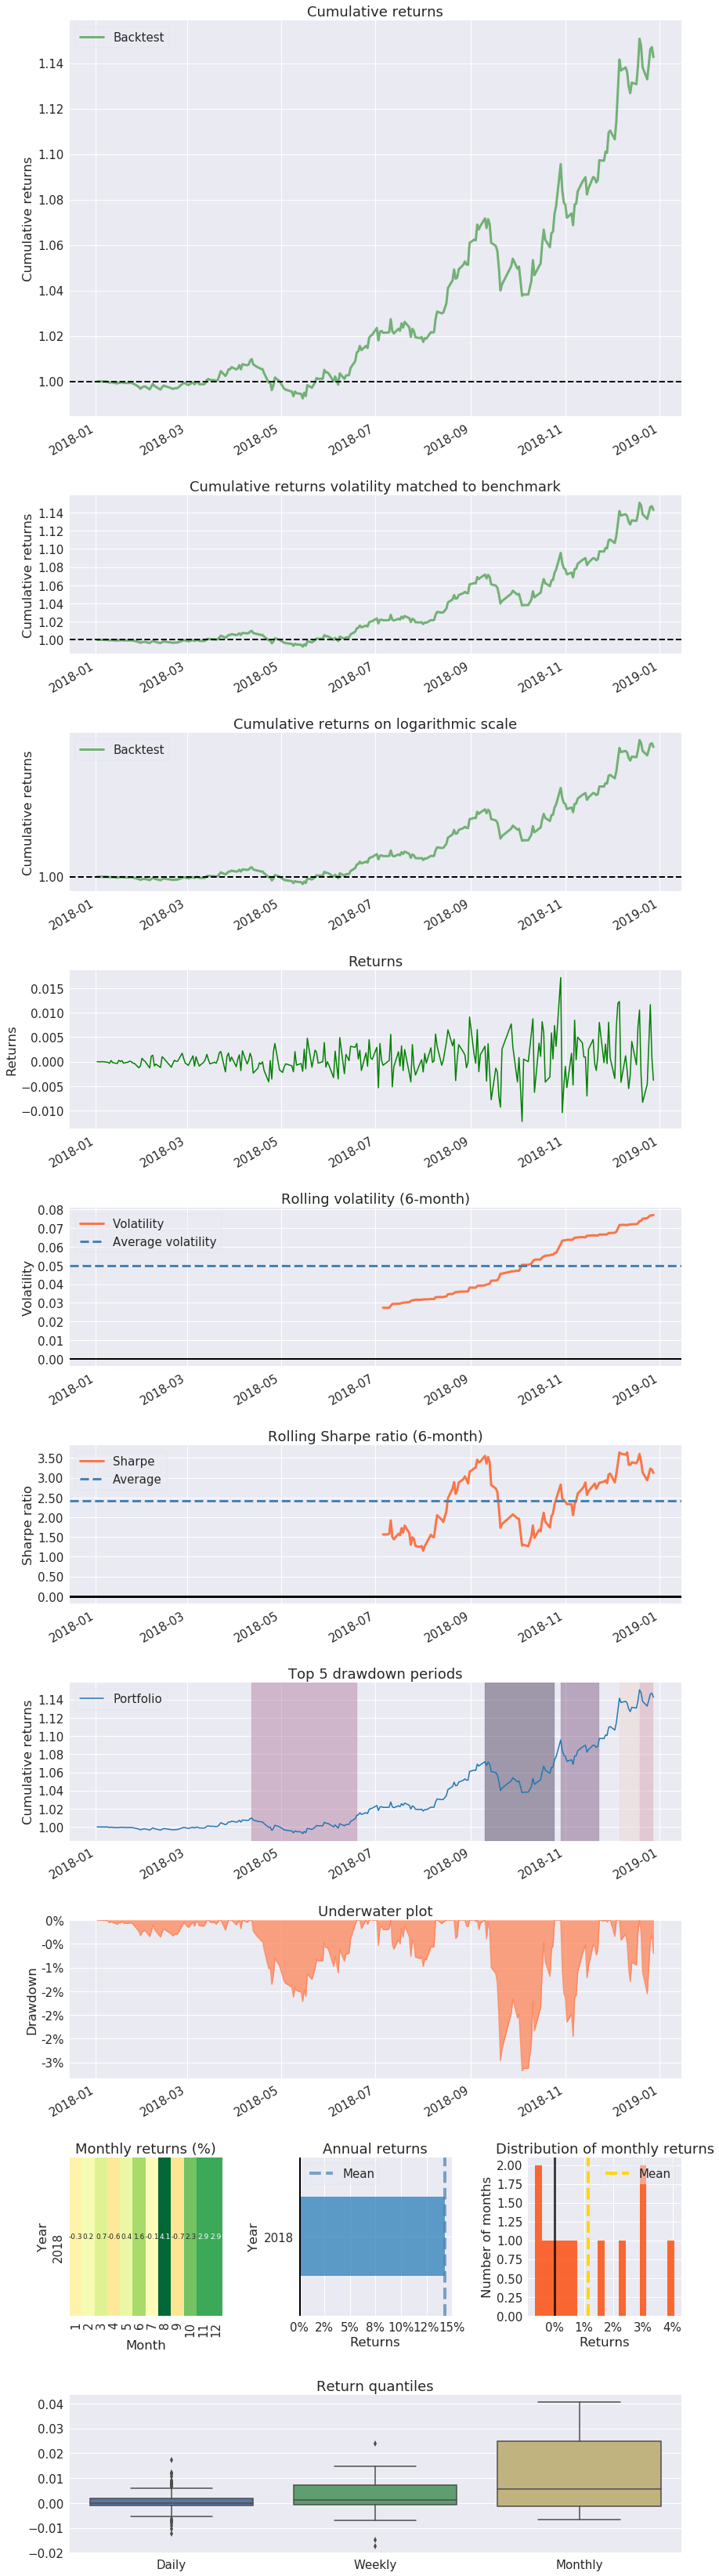

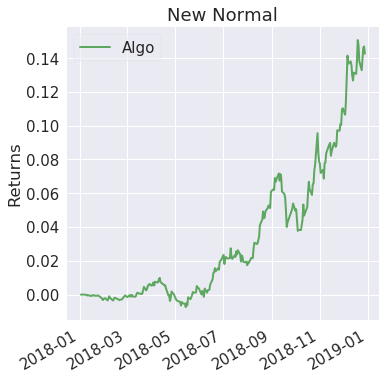

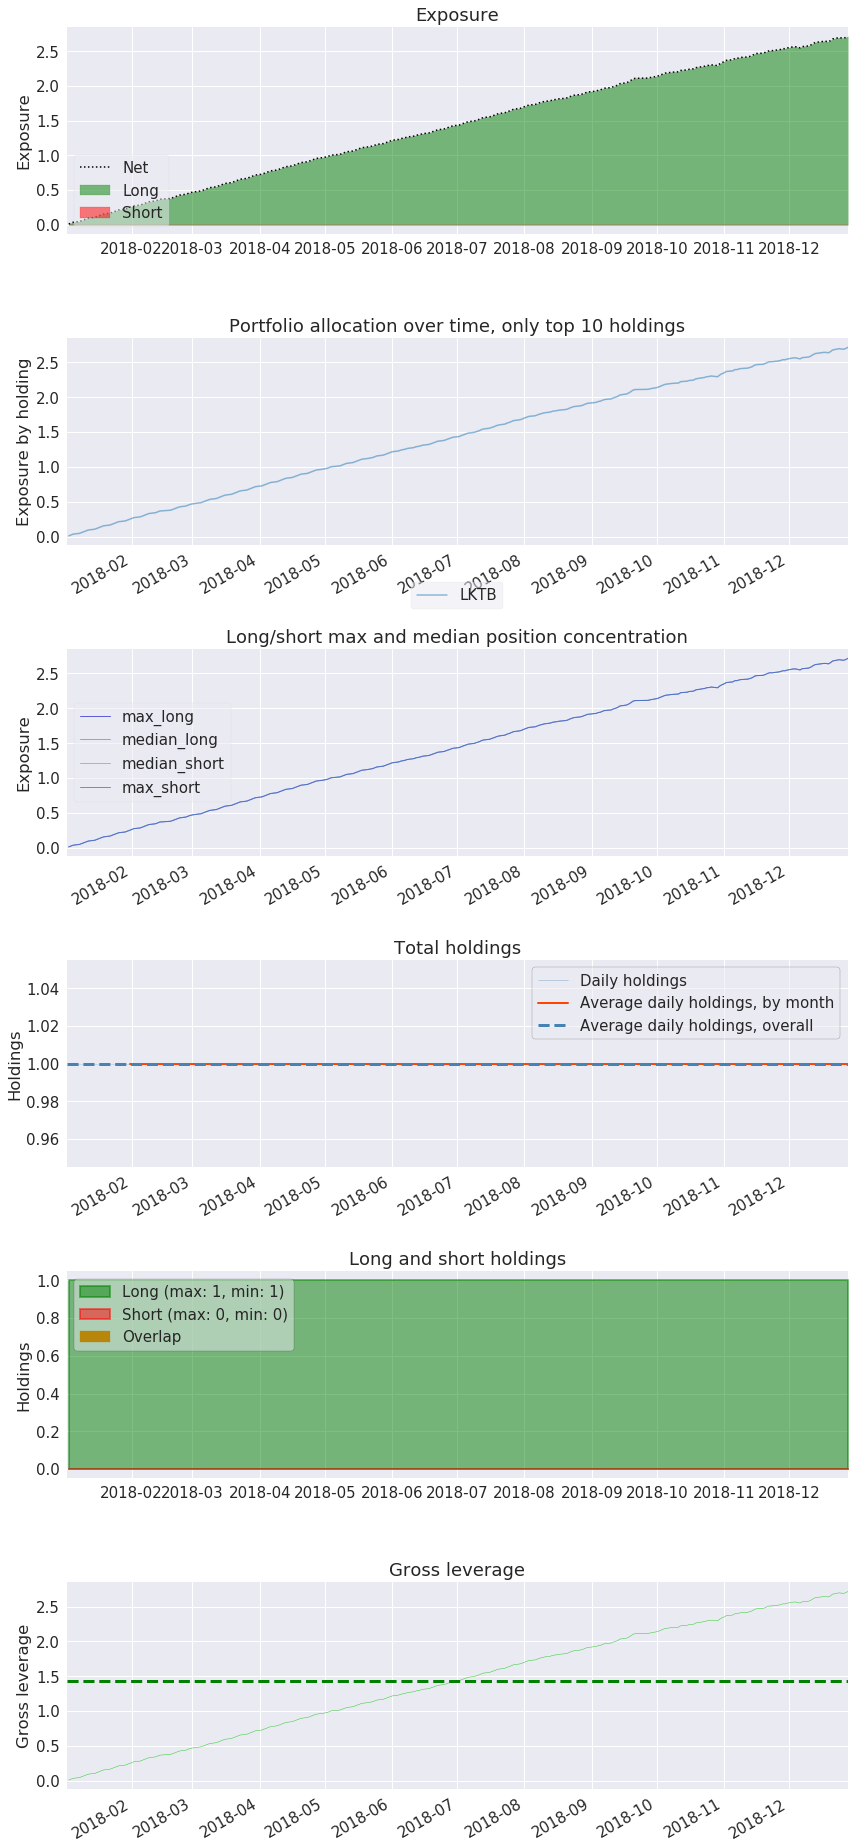

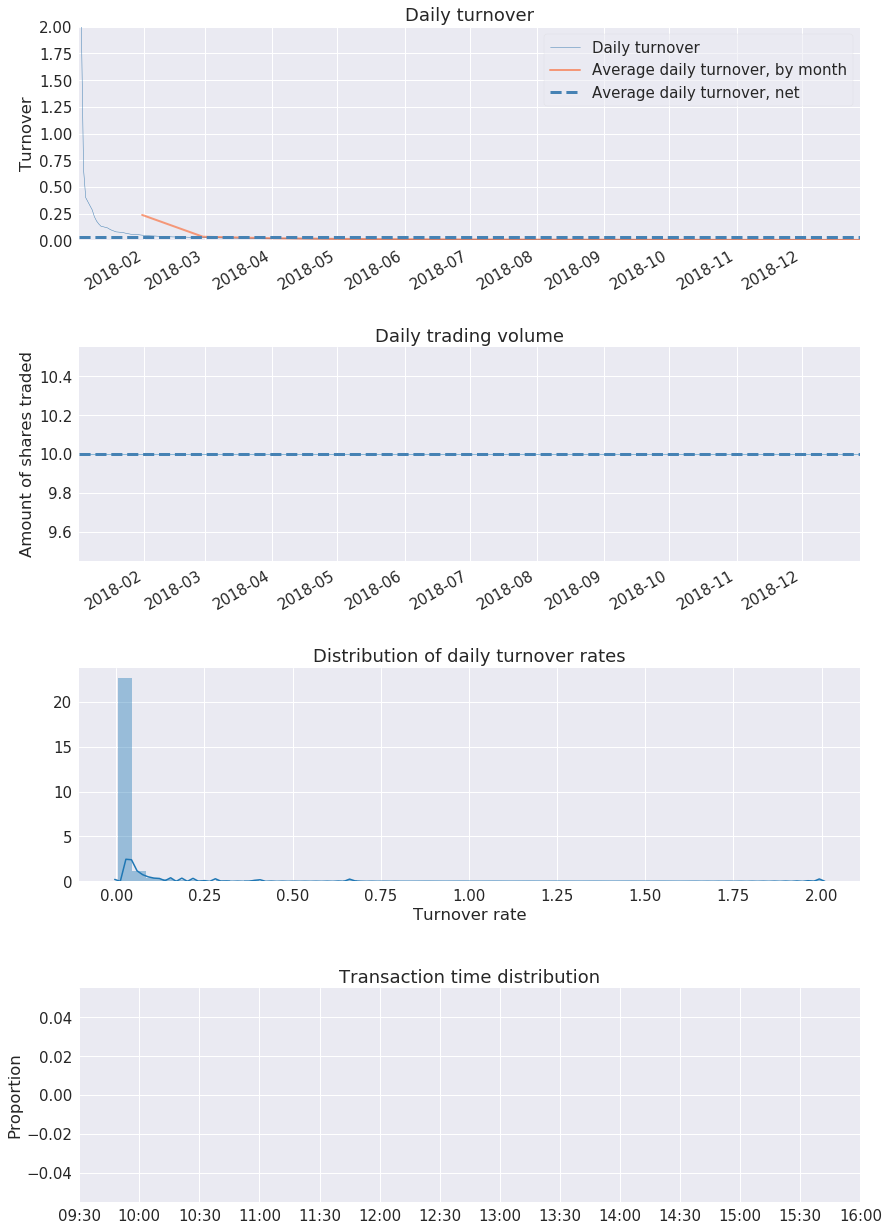

In [9]:
import pyfolio as pf
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
sheets = pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions)